
 # Quantifying “Killer Instinct” in IPL Death Overs using Bayesian Framework


 ### Load the CSV into a Jupyter Notebook

In [1]:
!pip install xlrd 

In [2]:
import pandas as pd
df = pd.read_excel(r"D:\Desktop\IPL_Bowler_Detailed_Data.xls")
df

,Match_ID,Match_Date,Pitch_Type,Phase,Over,Ball,Bowler,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket
0,29504,2023-04-12,Neutral,Powerplay,1,1,Bowler B,17.97,133.25,0,1
1,96402,2023-11-30,Batting,Powerplay,5,1,Bowler A,20.51,119.98,0,0
2,27383,2022-11-07,Neutral,Powerplay,1,5,Bowler B,30.05,124.73,2,0
3,99624,2022-04-10,Batting,Powerplay,5,3,Bowler B,21.29,147.69,1,0
4,65569,2023-06-23,Neutral,Powerplay,5,3,Bowler B,34.89,117.51,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4795,18611,2023-07-15,Bowling,Powerplay,3,6,Bowler B,28.71,131.71,1,0
4796,48165,2022-09-22,Neutral,Powerplay,3,4,Bowler A,34.12,116.88,0,0
4797,39550,2023-06-06,Neutral,Powerplay,1,3,Bowler A,32.99,108.62,1,0
4798,69821,2023-03-08,Neutral,Death,19,6,Bowler B,28.90,161.86,4,0


### Check data structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Match_ID       4800 non-null   int64         
 1   Match_Date     4800 non-null   datetime64[ns]
 2   Pitch_Type     4800 non-null   object        
 3   Phase          4800 non-null   object        
 4   Over           4800 non-null   int64         
 5   Ball           4800 non-null   int64         
 6   Bowler         4800 non-null   object        
 7   Batter_Avg     4800 non-null   float64       
 8   Batter_SR      4800 non-null   float64       
 9   Runs_Conceded  4800 non-null   int64         
 10  Is_Wicket      4800 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 412.6+ KB


In [4]:
df.describe()

,Match_ID,Match_Date,Over,Ball,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket
count,4800.000000,4800,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,56505.555000,2022-12-18 00:14:24,10.672500,3.500000,31.461442,140.015027,1.372708,0.070625
min,11935.000000,2022-01-07 00:00:00,1.000000,1.000000,-1.570000,69.190000,0.000000,0.000000
25%,34359.500000,2022-06-20 00:00:00,3.000000,2.000000,24.670000,125.960000,0.000000,0.000000
50%,55609.000000,2022-12-29 12:00:00,11.000000,3.500000,31.140000,138.400000,1.000000,0.000000
75%,80846.750000,2023-06-04 06:00:00,18.000000,5.000000,37.852500,152.925000,2.000000,0.000000
max,99882.000000,2023-12-01 00:00:00,20.000000,6.000000,66.740000,213.690000,6.000000,1.000000
std,26378.145461,NaN,7.476589,1.708003,9.763576,20.251785,1.774670,0.256224


In [5]:
df.isnull().sum()

Match_ID         0
Match_Date       0
Pitch_Type       0
Phase            0
Over             0
Ball             0
Bowler           0
Batter_Avg       0
Batter_SR        0
Runs_Conceded    0
Is_Wicket        0
dtype: int64

### Sort the Data Correctly

In [6]:
df = df.sort_values(by=["Match_ID", "Over", "Ball"]).reset_index(drop=True)

In [7]:
df.head()

,Match_ID,Match_Date,Pitch_Type,Phase,Over,Ball,Bowler,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket
0,11935,2023-01-28,Batting,Powerplay,2,1,Bowler B,33.46,131.68,0,0
1,11935,2023-01-28,Batting,Powerplay,2,2,Bowler B,41.41,138.41,3,0
2,11935,2023-01-28,Batting,Powerplay,2,3,Bowler B,26.80,107.22,0,0
3,11935,2023-01-28,Batting,Powerplay,2,4,Bowler B,9.31,136.44,0,0
4,11935,2023-01-28,Batting,Powerplay,2,5,Bowler B,19.52,105.85,0,1


### Remove duplicate ball entries

In [8]:
df = df.drop_duplicates(subset=["Match_ID", "Bowler", "Over", "Ball"]).reset_index(drop=True)


### Create Dot Ball Feature

In [9]:
df["Is_Dot"] = (df["Runs_Conceded"] == 0).astype(int)
df.head()

,Match_ID,Match_Date,Pitch_Type,Phase,Over,Ball,Bowler,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket,Is_Dot
0,11935,2023-01-28,Batting,Powerplay,2,1,Bowler B,33.46,131.68,0,0,1
1,11935,2023-01-28,Batting,Powerplay,2,2,Bowler B,41.41,138.41,3,0,0
2,11935,2023-01-28,Batting,Powerplay,2,3,Bowler B,26.80,107.22,0,0,1
3,11935,2023-01-28,Batting,Powerplay,2,4,Bowler B,9.31,136.44,0,0,1
4,11935,2023-01-28,Batting,Powerplay,2,5,Bowler B,19.52,105.85,0,1,1


### Create Previous Ball Dot (Correct Grouping)

In [10]:
df["Prev_Is_Dot"] = (
    df.groupby(["Match_ID", "Bowler", "Over"])["Is_Dot"]
      .shift(1)
      .fillna(0)
      .astype(int)
)
df.head(15)

,Match_ID,Match_Date,Pitch_Type,Phase,Over,Ball,Bowler,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket,Is_Dot,Prev_Is_Dot
0,11935,2023-01-28,Batting,Powerplay,2,1,Bowler B,33.46,131.68,0,0,1,0
1,11935,2023-01-28,Batting,Powerplay,2,2,Bowler B,41.41,138.41,3,0,0,1
2,11935,2023-01-28,Batting,Powerplay,2,3,Bowler B,26.80,107.22,0,0,1,0
3,11935,2023-01-28,Batting,Powerplay,2,4,Bowler B,9.31,136.44,0,0,1,1
4,11935,2023-01-28,Batting,Powerplay,2,5,Bowler B,19.52,105.85,0,1,1,1
5,11935,2023-01-28,Batting,Powerplay,2,6,Bowler B,29.76,108.50,0,1,1,1
6,11935,2023-01-28,Batting,Powerplay,6,1,Bowler B,27.91,137.66,2,0,0,0
7,11935,2023-01-28,Batting,Powerplay,6,2,Bowler B,26.83,115.52,4,0,0,0
8,11935,2023-01-28,Batting,Powerplay,6,3,Bowler B,43.20,130.75,3,0,0,0
9,11935,2023-01-28,Batting,Powerplay,6,4,Bowler B,32.37,124.62,1,0,0,0


### Create Pressure Flag (Death Overs Only)

In [11]:
df["Pressure"] = df["Prev_Is_Dot"].where(df["Phase"] == "Death",0)
df.head(15)

,Match_ID,Match_Date,Pitch_Type,Phase,Over,Ball,Bowler,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket,Is_Dot,Prev_Is_Dot,Pressure
0,11935,2023-01-28,Batting,Powerplay,2,1,Bowler B,33.46,131.68,0,0,1,0,0
1,11935,2023-01-28,Batting,Powerplay,2,2,Bowler B,41.41,138.41,3,0,0,1,0
2,11935,2023-01-28,Batting,Powerplay,2,3,Bowler B,26.80,107.22,0,0,1,0,0
3,11935,2023-01-28,Batting,Powerplay,2,4,Bowler B,9.31,136.44,0,0,1,1,0
4,11935,2023-01-28,Batting,Powerplay,2,5,Bowler B,19.52,105.85,0,1,1,1,0
5,11935,2023-01-28,Batting,Powerplay,2,6,Bowler B,29.76,108.50,0,1,1,1,0
6,11935,2023-01-28,Batting,Powerplay,6,1,Bowler B,27.91,137.66,2,0,0,0,0
7,11935,2023-01-28,Batting,Powerplay,6,2,Bowler B,26.83,115.52,4,0,0,0,0
8,11935,2023-01-28,Batting,Powerplay,6,3,Bowler B,43.20,130.75,3,0,0,0,0
9,11935,2023-01-28,Batting,Powerplay,6,4,Bowler B,32.37,124.62,1,0,0,0,0


### ZERO PRESSURE ON BALL 1

In [12]:
df.loc[df["Ball"] == 1, "Pressure"] = 0
df.head(15)


,Match_ID,Match_Date,Pitch_Type,Phase,Over,Ball,Bowler,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket,Is_Dot,Prev_Is_Dot,Pressure
0,11935,2023-01-28,Batting,Powerplay,2,1,Bowler B,33.46,131.68,0,0,1,0,0
1,11935,2023-01-28,Batting,Powerplay,2,2,Bowler B,41.41,138.41,3,0,0,1,0
2,11935,2023-01-28,Batting,Powerplay,2,3,Bowler B,26.80,107.22,0,0,1,0,0
3,11935,2023-01-28,Batting,Powerplay,2,4,Bowler B,9.31,136.44,0,0,1,1,0
4,11935,2023-01-28,Batting,Powerplay,2,5,Bowler B,19.52,105.85,0,1,1,1,0
5,11935,2023-01-28,Batting,Powerplay,2,6,Bowler B,29.76,108.50,0,1,1,1,0
6,11935,2023-01-28,Batting,Powerplay,6,1,Bowler B,27.91,137.66,2,0,0,0,0
7,11935,2023-01-28,Batting,Powerplay,6,2,Bowler B,26.83,115.52,4,0,0,0,0
8,11935,2023-01-28,Batting,Powerplay,6,3,Bowler B,43.20,130.75,3,0,0,0,0
9,11935,2023-01-28,Batting,Powerplay,6,4,Bowler B,32.37,124.62,1,0,0,0,0


### Encode Categories (Pitch Type, Bowler)

In [13]:
df = pd.get_dummies(df, columns=["Pitch_Type", "Bowler"], drop_first=True)
df.head(20)

,Match_ID,Match_Date,Phase,Over,Ball,Batter_Avg,Batter_SR,Runs_Conceded,Is_Wicket,Is_Dot,Prev_Is_Dot,Pressure,Pitch_Type_Bowling,Pitch_Type_Neutral,Bowler_Bowler B
0,11935,2023-01-28,Powerplay,2,1,33.46,131.68,0,0,1,0,0,False,False,True
1,11935,2023-01-28,Powerplay,2,2,41.41,138.41,3,0,0,1,0,False,False,True
2,11935,2023-01-28,Powerplay,2,3,26.80,107.22,0,0,1,0,0,False,False,True
3,11935,2023-01-28,Powerplay,2,4,9.31,136.44,0,0,1,1,0,False,False,True
4,11935,2023-01-28,Powerplay,2,5,19.52,105.85,0,1,1,1,0,False,False,True
5,11935,2023-01-28,Powerplay,2,6,29.76,108.50,0,1,1,1,0,False,False,True
6,11935,2023-01-28,Powerplay,6,1,27.91,137.66,2,0,0,0,0,False,False,True
7,11935,2023-01-28,Powerplay,6,2,26.83,115.52,4,0,0,0,0,False,False,True
8,11935,2023-01-28,Powerplay,6,3,43.20,130.75,3,0,0,0,0,False,False,True
9,11935,2023-01-28,Powerplay,6,4,32.37,124.62,1,0,0,0,0,False,False,True


In [14]:
df.columns

Index(['Match_ID', 'Match_Date', 'Phase', 'Over', 'Ball', 'Batter_Avg',
       'Batter_SR', 'Runs_Conceded', 'Is_Wicket', 'Is_Dot', 'Prev_Is_Dot',
       'Pressure', 'Pitch_Type_Bowling', 'Pitch_Type_Neutral',
       'Bowler_Bowler B'],
      dtype='object')

In [15]:
!pip install scikit-learn


### Choose Features for the Bayesian Model

In [16]:
features = [
    "Pressure",
    "Pitch_Type_Bowling",
    "Pitch_Type_Neutral",
    "Bowler_Bowler B",
    "Batter_Avg"
]

target = "Is_Wicket"



### Prepare Data for PyMC

In [17]:
import numpy as np

X = df[features].values.astype("float64")
y = df[target].values.astype("int32")



### Build Bayesian Logistic Regression in PyMC

In [18]:

import numpy as np
import pymc as pm
import pytensor.tensor as at
import arviz as az
from sklearn.preprocessing import StandardScaler

# 1. Scale features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X).astype("float64")


with pm.Model() as model:
    
    # 2. Weak priors
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    beta = pm.Normal("Beta", mu=0, sigma=10, shape=X_scaled.shape[1])

    # 3. PyMC Data container
    X_data = pm.Data("X_data", X_scaled)
    
    # 4. Linear model
    logits = intercept + at.dot(X_data, beta)
    
    # 5. Likelihood
    p = pm.Deterministic("p", pm.math.sigmoid(logits))
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)
    
    # 6. Sampling
    
    trace = pm.sample(
        1000,
        tune=500,          # reduced tuning = faster
        chains=2,          # 2 chains = stable & fast
        cores=2,           # parallel processing
        target_accept=0.9  # lower accept target = faster
    )



WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, Beta]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 8443 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


### Extract Pressure Coefficients for Both

In [19]:
az.summary(trace)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-2.898,0.073,-3.029,-2.760,0.002,0.002,1761.0,1543.0,1.0
Beta[0],0.619,0.047,0.537,0.712,0.001,0.001,1712.0,1109.0,1.0
Beta[1],0.137,0.069,0.002,0.262,0.001,0.002,2173.0,1478.0,1.0
Beta[2],0.070,0.069,-0.050,0.209,0.002,0.001,2076.0,1273.0,1.0
Beta[3],0.442,0.066,0.318,0.562,0.001,0.001,2421.0,1602.0,1.0
...,...,...,...,...,...,...,...,...,...
p[4363],0.058,0.008,0.044,0.073,0.000,0.000,2419.0,1662.0,1.0
p[4364],0.062,0.007,0.050,0.076,0.000,0.000,2554.0,1545.0,1.0
p[4365],0.051,0.011,0.032,0.071,0.000,0.000,2429.0,1685.0,1.0
p[4366],0.063,0.007,0.050,0.077,0.000,0.000,2584.0,1502.0,1.0


 ### Extract the parameters

In [23]:
pressure_A = trace.posterior["Beta"].sel(Beta_dim_0=0)

bowlerB_effect = trace.posterior["Beta"].sel(Beta_dim_0=3)

pressure_B = pressure_A + bowlerB_effect



### Plot Posterior Distributions

Text(0.5, 1.0, 'Pressure Effect – Bowler B')

<Figure size 1000x500 with 0 Axes>

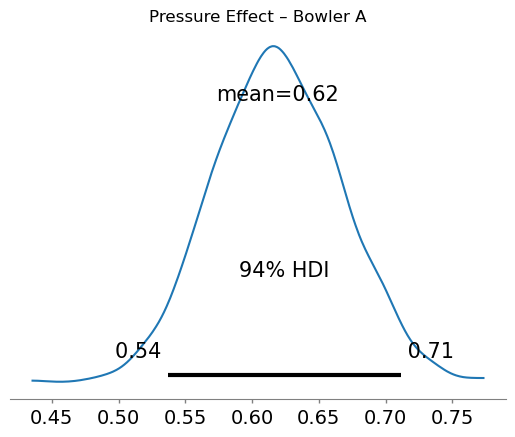

<Figure size 1000x500 with 0 Axes>

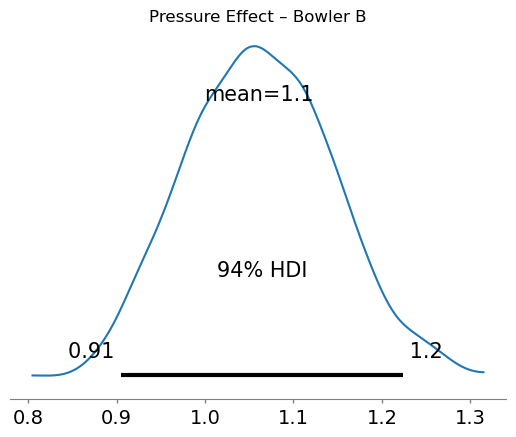

In [25]:
import matplotlib.pyplot as plt
import arviz as az

plt.figure(figsize=(10,5))
az.plot_posterior(pressure_A.values, hdi_prob=0.94)
plt.title("Pressure Effect – Bowler A")

plt.figure(figsize=(10,5))
az.plot_posterior(pressure_B.values, hdi_prob=0.94)
plt.title("Pressure Effect – Bowler B")



### Probability that Bowler B > Bowler A

In [27]:
prob_B_better = (pressure_B > pressure_A).mean().item()
prob_B_better


1.0

### Conclusion

In [29]:
print("Bowler A Pressure Mean:", float(pressure_A.mean()))
print("Bowler B Pressure Mean:", float(pressure_B.mean()))
print("Probability Bowler B > Bowler A:", prob_B_better)

if prob_B_better > 0.9:
    print("\nConclusion: Bowler B is significantly better under pressure.")
elif prob_B_better > 0.7:
    print("\nConclusion: Bowler B is likely better under pressure.")
else:
    print("\nConclusion: No strong difference between A and B.")


Bowler A Pressure Mean: 0.6192038037444527
Bowler B Pressure Mean: 1.061332369821621
Probability Bowler B > Bowler A: 1.0

Conclusion: Bowler B is significantly better under pressure.
